In [253]:
import pandas as pd
import plotly.express as px
import seaborn as sn
import sys
import os
from xml.etree import ElementTree
import numpy as np

In [4]:
!pwd

/Users/mikesoukup/Desktop/NU MSDS/MSDS 452/TrafficAnalysis_MSDS452


# Taxi Trips run in Series

In [83]:
# Create file paths from pwd
base = os.getcwd()
ext = '/sumo/tools/ChicagoNetworkReduced'
tripinfo = base+ext+'/tripinfo_solo.xml'
vehroutes = base+ext+'/vehroutes_solo.xml'
collisions = base+ext+'/collisions_solo.xml'
stats = base+ext+'/sim_stats_out_solo.xml'

In [84]:
solo_df = pd.read_xml(tripinfo)

In [85]:
solo_df.head()

,id,depart,departLane,departPos,departSpeed,departDelay,arrival,arrivalLane,arrivalPos,arrivalSpeed,...,routeLength,waitingTime,waitingCount,stopTime,timeLoss,rerouteNo,devices,vType,speedFactor,vaporized
0,taxi_0,0.0,583081972_0,5.1,0.0,0.00,367.0,1040118849#0_0,165.13,12.83,...,2447.73,178.0,7,0.0,265.11,1,vehroute_taxi_0 tripinfo_taxi_0 routing_taxi_0,veh_passenger,1.0,NaN
1,taxi_1,367.0,965387812#7_0,5.1,0.0,366.36,650.0,145857394#0_0,102.18,21.83,...,2229.65,84.0,8,0.0,198.62,1,vehroute_taxi_1 tripinfo_taxi_1 routing_taxi_1,veh_passenger,1.0,NaN
2,taxi_2,650.0,461207921#0_1,5.1,0.0,649.34,911.0,23891801#0_0,274.92,21.38,...,2046.81,93.0,7,0.0,180.78,1,vehroute_taxi_2 tripinfo_taxi_2 routing_taxi_2,veh_passenger,1.0,NaN
3,taxi_3,911.0,134319745#0_0,5.1,0.0,910.06,1207.0,56720835#3_0,97.85,21.16,...,1996.50,125.0,8,0.0,221.45,1,vehroute_taxi_3 tripinfo_taxi_3 routing_taxi_3,veh_passenger,1.0,NaN
4,taxi_4,1207.0,-316912742_0,5.1,0.0,1205.84,1644.0,134319745#0_0,121.88,24.16,...,2837.67,246.0,8,0.0,331.81,1,vehroute_taxi_4 tripinfo_taxi_4 routing_taxi_4,veh_passenger,1.0,NaN


In [86]:
total_time = solo_df.duration.sum()
print(f"Total time for all trips to run: {total_time:,}s")

Total time for all trips to run: 264,864.0s


In [87]:
subset_df = pd.read_csv("trip_subset_with_SUMO_ids.csv", index_col = 0)

In [88]:
series_df = subset_df.merge(solo_df, how = 'inner', on = 'id')

In [89]:
series_df.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'Pickup_x', 'Pickup_y', 'Dropoff_x',
       'Dropoff_y', 'start_edge', 'end_edge', 'id', 'depart', 'departLane',
       'departPos', 'departSpeed', 'departDelay', 'arrival', 'arrivalLane',
       'arrivalPos', 'arrivalSpeed', 'duration', 'routeLength', 'waitingTime',
       'waitingCount', 'stopTime', 'timeLoss', 'rerouteNo', 'devices', 'vType',
       'speedFactor', 'vaporized'],
      dtype='object')

In [90]:
series_df = series_df[['Trip ID','Taxi ID','Trip Seconds','Trip Miles',
'id','duration','routeLength','waitingTime','waitingCount','stopTime',
'timeLoss']]

In [91]:
series_df['routeLength_miles'] = series_df['routeLength']/1609

In [92]:
series_df['time_delta'] = series_df['Trip Seconds'] - series_df['duration']

In [93]:
## Histogram of trip edge_lengths
fig = px.histogram(series_df, x = "time_delta",
                    title = "SUMO Simulation Series Time Delta")
fig.update_layout(title_x = 0.5)
fig.show()

In [94]:
series_df.rename({'duration':'seriesDuration',
'routeLength_miles':'seriesLength',
'id':'seriesId'}, inplace = True, axis = 1)

In [95]:
series_df.head()

,Trip ID,Taxi ID,Trip Seconds,Trip Miles,seriesId,seriesDuration,routeLength,waitingTime,waitingCount,stopTime,timeLoss,seriesLength,time_delta
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...,300,0.00,taxi_0,367.0,2447.73,178.0,7,0.0,265.11,1.521274,-67.0
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,100dbc840e5381b47a92bfbdbc3f231bc18b28af8cba22...,540,1.20,taxi_1,283.0,2229.65,84.0,8,0.0,198.62,1.385736,257.0
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,053e2981d702d762acc06cc5d3076f16fa3e2ad28270ac...,337,0.99,taxi_2,261.0,2046.81,93.0,7,0.0,180.78,1.272101,76.0
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,a418af5d440c9260ccfd29882c6c4ea78d7269df7d5130...,480,1.00,taxi_3,296.0,1996.50,125.0,8,0.0,221.45,1.240833,184.0
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,f7c942487c3ce86530856b5920cd4f28b0cff930a8bf7e...,720,2.40,taxi_4,437.0,2837.67,246.0,8,0.0,331.81,1.763623,283.0


# Taxi Trips run in Parallel

In [64]:
# Create file paths from pwd
base = os.getcwd()
ext = '/sumo/tools/ChicagoNetworkReduced'
tripinfo = base+ext+'/tripinfo.xml'
vehroutes = base+ext+'/vehroutes.xml'
collisions = base+ext+'/collisions.xml'
stats = base+ext+'/sim_stats_out.xml'

## Look at trip info!

In [65]:
trip_df = pd.read_xml(tripinfo)

In [6]:
trip_df.head()

,id,depart,departLane,departPos,departSpeed,departDelay,arrival,arrivalLane,arrivalPos,arrivalSpeed,...,routeLength,waitingTime,waitingCount,stopTime,timeLoss,rerouteNo,devices,vType,speedFactor,vaporized
0,taxi_25,11.0,220306134#2_3,5.1,0.0,0.27,97.0,461207921#0_0,192.92,14.07,...,785.99,15.0,1,0.0,49.06,1,vehroute_taxi_25 tripinfo_taxi_25 routing_taxi_25,veh_passenger,1.0,NaN
1,taxi_32,15.0,145857394#0_0,5.1,0.0,0.75,124.0,319345470#0_0,103.39,20.51,...,1168.25,11.0,3,0.0,62.72,1,vehroute_taxi_32 tripinfo_taxi_32 routing_taxi_32,veh_passenger,1.0,NaN
2,taxi_94,46.0,461207921#0_1,5.1,0.0,1.85,138.0,220306134#2_3,70.15,22.57,...,759.55,28.0,1,0.0,59.53,1,vehroute_taxi_94 tripinfo_taxi_94 routing_taxi_94,veh_passenger,1.0,NaN
3,taxi_146,71.0,461207921#0_1,5.1,0.0,0.05,141.0,220306134#2_3,70.15,22.84,...,759.55,6.0,1,0.0,37.99,1,vehroute_taxi_146 tripinfo_taxi_146 routing_ta...,veh_passenger,1.0,NaN
4,taxi_75,37.0,1031291396#1_0,5.1,0.0,1.65,152.0,1049318471#0_1,77.85,27.59,...,1010.50,33.0,3,0.0,74.21,1,vehroute_taxi_75 tripinfo_taxi_75 routing_taxi_75,veh_passenger,1.0,NaN


In [7]:
## Histogram of Trip Durations:
fig = px.histogram(trip_df, x = "duration",
                    title = "SUMO Taxi Trip Duration Histogram")
fig.update_layout(title_x = 0.5)
fig.show()

duration = "The time the vehicle needed to accomplish the route in seconds."

In [9]:
## Histogram of Trip Lengths:
fig = px.histogram(trip_df, x = "routeLength",
                    title = "SUMO Taxi Trip Length Histogram")
fig.update_layout(title_x = 0.5)
fig.show()

routeLength = The length of the vehicles route in m.

In [10]:
trip_df['routeLength_miles'] = trip_df['routeLength']/1609

In [11]:
## Histogram of Trip Lengths (miles):
fig = px.histogram(trip_df, x = "routeLength_miles",
                    title = "SUMO Taxi Trip Length Histogram in Miles")
fig.update_layout(title_x = 0.5)
fig.show()

In [12]:
## Scatter Plot of lenght vs. duration
fig = px.scatter(trip_df, x = "routeLength_miles", y = "duration",
                title = "SUMO Simulation Route Length vs. Duration")
fig.update_layout(title_x = 0.5)
fig.show()

In [13]:
## Histogram of waiting times:
fig = px.histogram(trip_df, x = "waitingTime",
                  title = "SUMO Simulation Waiting Time Histogram")
fig.update_layout(title_x = 0.5)
fig.show()

waitingTime = The time in which the vehicles speed was below or equal to 0.1 m/s (not including scheduled stops.)

In [14]:
## Look at correlation between waiting time and duration:
fig = px.scatter(trip_df, x = "waitingTime", y = "duration",
                    title = "SUMO Simulation Waiting Time vs. Duration")
fig.update_layout(title_x = 0.5)
fig.show()

In [15]:
## Histograph of waitingCount:
fig = px.histogram(trip_df, x = "waitingCount",
                    title = "SUMO Simulation Waiting Count")
fig.update_layout(title_x = 0.5)
fig.show()

waitingCount = The number of times the vehicle's speed went below or equal 0.1 m/s during the trip.

In [17]:
## Look at correlation between waiting time and duration:
fig = px.scatter(trip_df, x = "routeLength_miles", y = "waitingCount",
                    title = "SUMO Simulation Waiting Count vs. Route Length")
fig.update_layout(title_x = 0.5)
fig.show()

In [18]:
## timeLoss
fig = px.histogram(trip_df, x = "timeLoss",
                    title = "SUMO Simulation Time Loss")
fig.update_layout(title_x = 0.5)
fig.show()

timeLoss = the time lost due to driving below the ideal speed. 

In [19]:
## Histograph of speedFactor:
fig = px.histogram(trip_df, x = "speedFactor",
                    title = "SUMO Simulation Speed Factor")
fig.update_layout(title_x = 0.5)
fig.show()

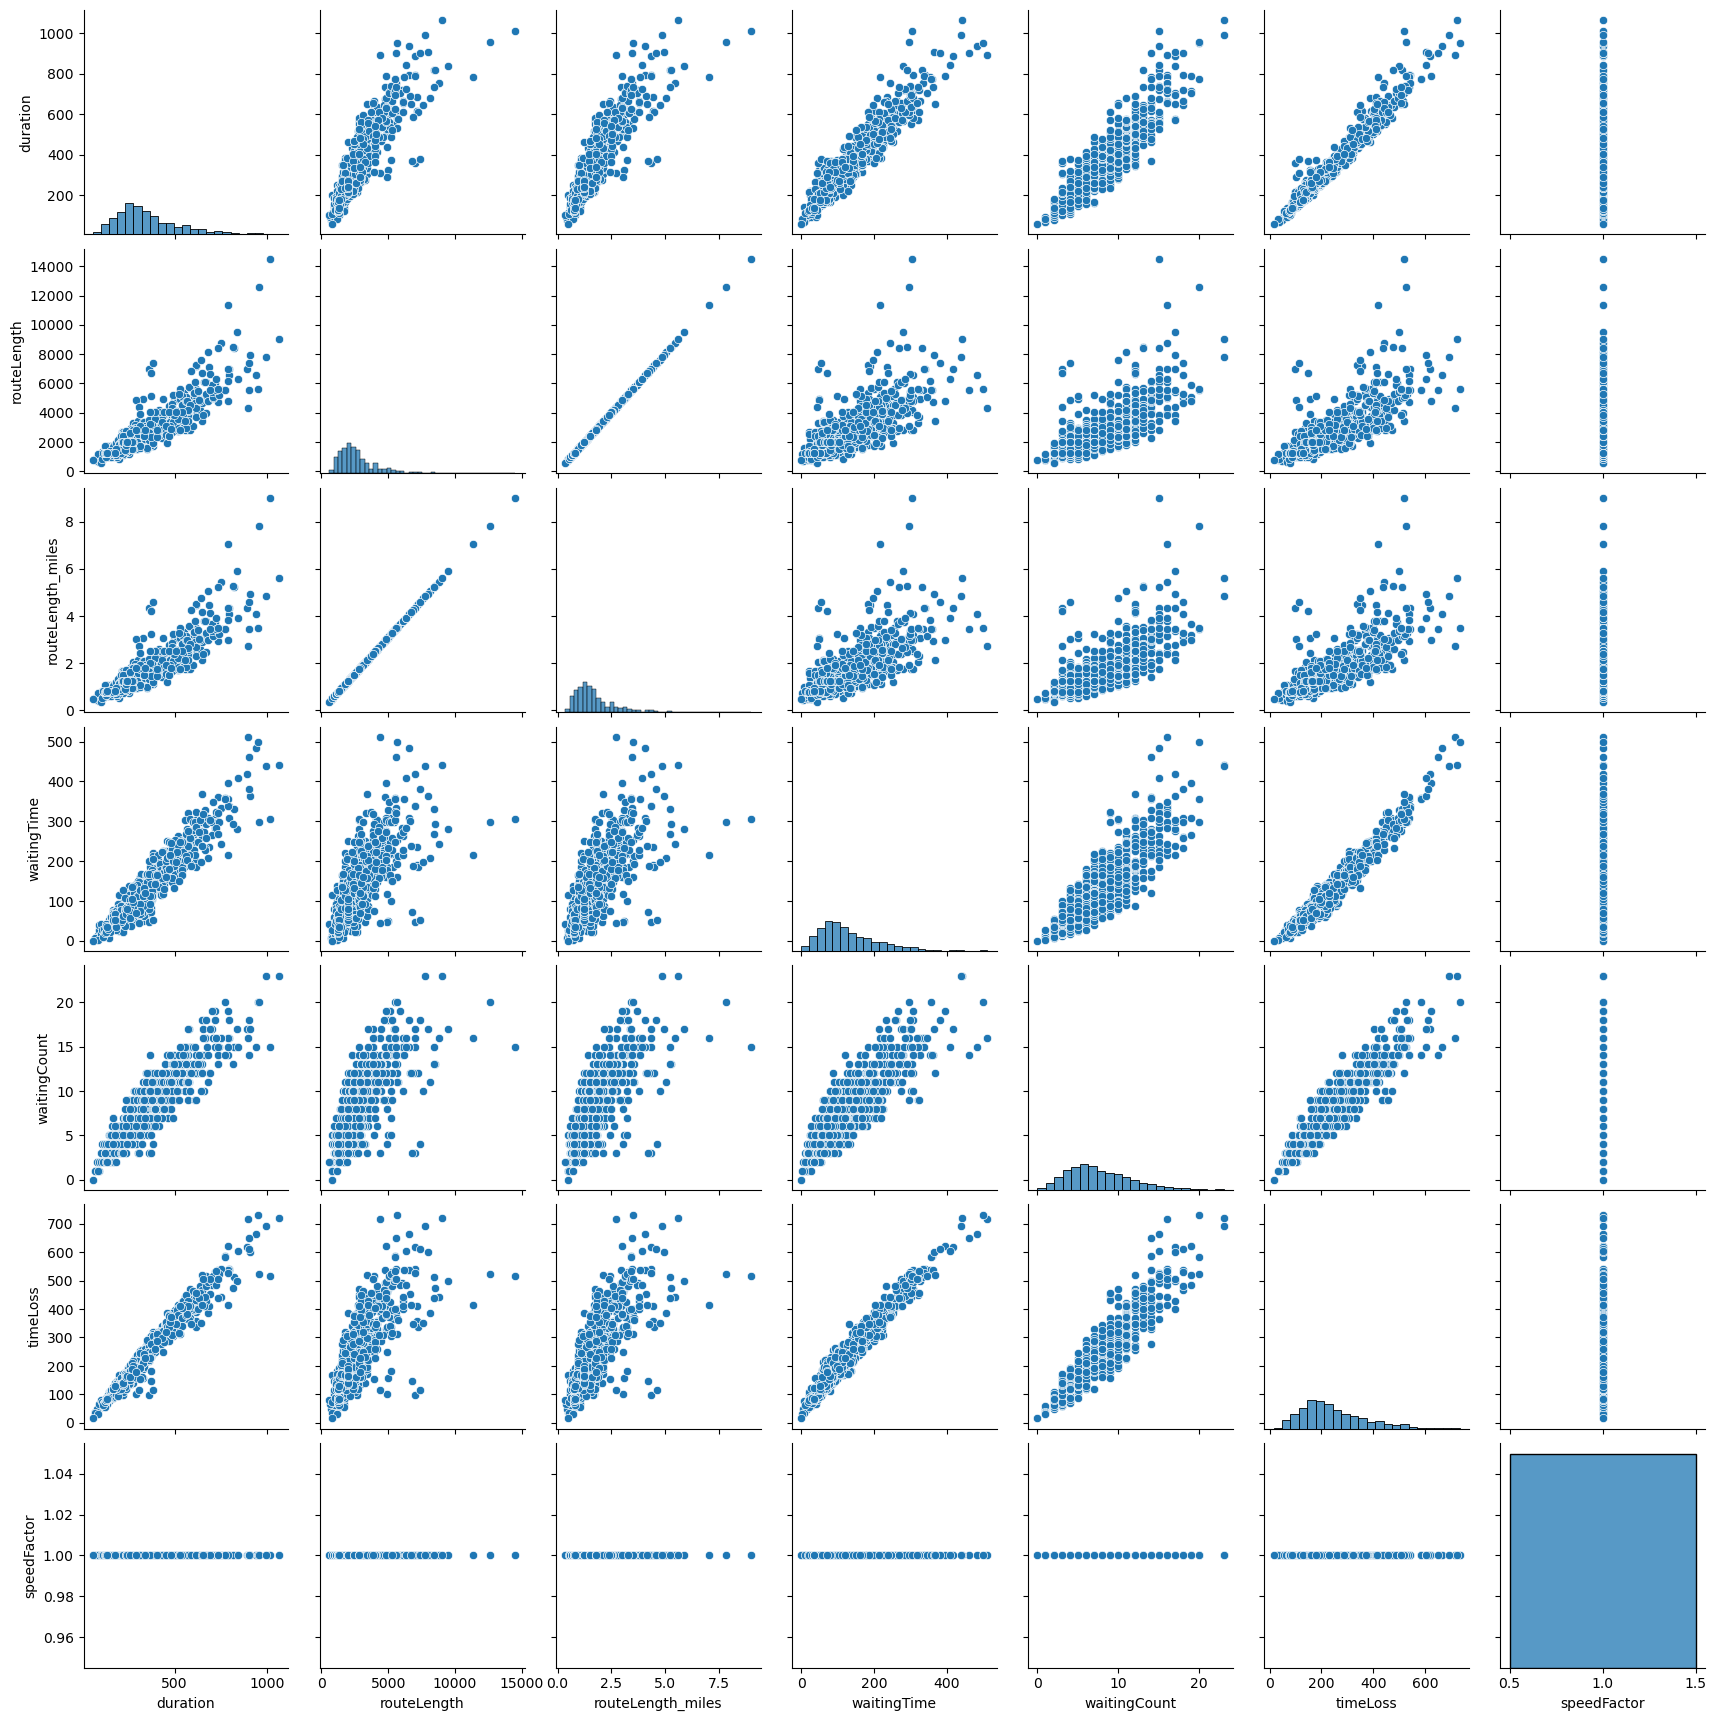

In [21]:
trip_pp = trip_df[['duration','routeLength', 'routeLength_miles',
'waitingTime','waitingCount','timeLoss','speedFactor']]
sn.pairplot(trip_pp)

In [22]:
trip_df.corr()

,depart,departPos,departSpeed,departDelay,arrival,arrivalPos,arrivalSpeed,duration,routeLength,waitingTime,waitingCount,stopTime,timeLoss,rerouteNo,speedFactor,vaporized,routeLength_miles
depart,1.000000,NaN,NaN,0.755238,0.680983,-0.020312,0.115813,-0.054176,-0.030533,-0.066741,-0.046606,NaN,-0.061561,0.541697,NaN,NaN,-0.030533
departPos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departDelay,0.755238,NaN,NaN,1.000000,0.510447,0.006804,0.109564,-0.046175,-0.033387,-0.043596,-0.037419,NaN,-0.044375,0.704693,NaN,NaN,-0.033387
arrival,0.680983,NaN,NaN,0.510447,1.000000,0.188773,0.101348,0.694331,0.620971,0.643280,0.633072,NaN,0.670881,0.422676,NaN,NaN,0.620971
arrivalPos,-0.020312,NaN,NaN,0.006804,0.188773,1.000000,0.427732,0.277364,0.349401,0.237033,0.245638,NaN,0.243463,-0.020701,NaN,NaN,0.349401
arrivalSpeed,0.115813,NaN,NaN,0.109564,0.101348,0.427732,1.000000,0.024381,0.114358,-0.001756,-0.006057,NaN,0.002649,0.029110,NaN,NaN,0.114358
duration,-0.054176,NaN,NaN,-0.046175,0.694331,0.277364,0.024381,1.000000,0.876735,0.942737,0.909030,NaN,0.975282,0.043997,NaN,NaN,0.876735
routeLength,-0.030533,NaN,NaN,-0.033387,0.620971,0.349401,0.114358,0.876735,1.000000,0.706045,0.721834,NaN,0.752895,0.020883,NaN,NaN,1.000000
waitingTime,-0.066741,NaN,NaN,-0.043596,0.643280,0.237033,-0.001756,0.942737,0.706045,1.000000,0.853140,NaN,0.974680,0.051810,NaN,NaN,0.706045


In [23]:
trip_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
depart,793.0,232.205549,1.677788e+02,0.000000,104.000000,209.000000,318.000000,825.000000
departPos,793.0,5.100000,6.398921e-14,5.100000,5.100000,5.100000,5.100000,5.100000
departSpeed,793.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
departDelay,793.0,34.749281,9.189424e+01,0.000000,0.370000,0.770000,3.400000,427.920000
arrival,793.0,584.665826,2.327951e+02,97.000000,415.000000,548.000000,726.000000,1557.000000
arrivalPos,793.0,155.378386,1.371390e+02,23.090000,95.610000,121.880000,180.550000,814.070000
arrivalSpeed,793.0,20.253960,6.895716e+00,4.470000,13.690000,21.130000,23.870000,39.440000
duration,793.0,352.460277,1.707264e+02,58.000000,235.000000,313.000000,439.000000,1065.000000
routeLength,793.0,2756.492119,1.584377e+03,569.790000,1725.370000,2392.410000,3282.400000,14501.350000
waitingTime,793.0,132.138714,8.444546e+01,0.000000,72.000000,112.000000,175.000000,512.000000


## Vehicle Route information!!

In [24]:
vr_df = pd.read_xml(vehroutes)

In [25]:
vr_df.head()

,id,type,depart,departLane,speedFactor,arrival,route,routeDistribution
0,taxi_25,veh_passenger,11.0,3,1.0,97.0,NaN,NaN
1,taxi_32,veh_passenger,15.0,0,1.0,124.0,NaN,NaN
2,taxi_94,veh_passenger,46.0,1,1.0,138.0,NaN,NaN
3,taxi_146,veh_passenger,71.0,1,1.0,141.0,NaN,NaN
4,taxi_75,veh_passenger,37.0,0,1.0,152.0,NaN,NaN


This isn't really what we want. The key thing here to get is going to be number of edges. But pandas does a poor job parsing all of this content out.

In [26]:
tree = ElementTree.parse(vehroutes)

In [27]:
root = tree.getroot()

In [28]:
vr_data = []
for child in root:
    v_id = child.attrib['id']
    for schild in child:
        try:
            edge_count = len(schild.attrib['edges'].split())
            t = (v_id, edge_count)
            vr_data.append(t)
        except:
            continue

In [29]:
vr_df = pd.DataFrame(data = vr_data, columns = ['trip','edge_length'])

In [30]:
vr_df.head()

,trip,edge_length
0,taxi_25,8
1,taxi_32,12
2,taxi_94,11
3,taxi_146,11
4,taxi_75,18


In [31]:
## Histogram of trip edge_lengths
fig = px.histogram(vr_df, x = "edge_length",
                    title = "SUMO Simulation Trip Edge Counts")
fig.update_layout(title_x = 0.5)
fig.show()

In [66]:
subset_df = pd.read_csv("trip_subset_with_SUMO_ids.csv", index_col = 0)

In [67]:
subset_df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Pickup_x,Pickup_y,Dropoff_x,Dropoff_y,start_edge,end_edge,id
3,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...,01/01/2019 08:45:00 PM,01/01/2019 08:45:00 PM,300,0.00,1.703132e+10,1.703108e+10,32.0,8.0,...,41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),17685.426993,13900.945181,17264.016809,15477.175148,583081972,1040118849#0,taxi_0
4,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,100dbc840e5381b47a92bfbdbc3f231bc18b28af8cba22...,01/02/2019 08:30:00 AM,01/02/2019 08:30:00 AM,540,1.20,1.703108e+10,1.703128e+10,8.0,28.0,...,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),17037.308153,14692.385494,15875.713054,13949.005637,965387812#7,145857394#0,taxi_1
7,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,053e2981d702d762acc06cc5d3076f16fa3e2ad28270ac...,01/03/2019 04:30:00 PM,01/03/2019 04:30:00 PM,337,0.99,1.703108e+10,1.703108e+10,8.0,8.0,...,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),17799.866501,15015.586415,16294.114693,14824.863321,461207921#0,23891801#0,taxi_2
11,b7feccc5630fbdad764d1372cd385b1b5b50a732,a418af5d440c9260ccfd29882c6c4ea78d7269df7d5130...,01/04/2019 04:30:00 PM,01/04/2019 04:45:00 PM,480,1.00,1.703184e+10,1.703108e+10,32.0,8.0,...,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),16706.997981,13464.767444,17258.266813,14739.085207,134319745#0,56720835#3,taxi_3
14,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,f7c942487c3ce86530856b5920cd4f28b0cff930a8bf7e...,01/05/2019 05:00:00 PM,01/05/2019 05:00:00 PM,720,2.40,1.703108e+10,1.703184e+10,8.0,32.0,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),17715.232392,15382.424498,16706.997981,13464.767444,-316912742,134319745#0,taxi_4


In [68]:
simul_df = subset_df.merge(trip_df, how = "inner", on = 'id')

In [69]:
simul_df.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'Pickup_x', 'Pickup_y', 'Dropoff_x',
       'Dropoff_y', 'start_edge', 'end_edge', 'id', 'depart', 'departLane',
       'departPos', 'departSpeed', 'departDelay', 'arrival', 'arrivalLane',
       'arrivalPos', 'arrivalSpeed', 'duration', 'routeLength', 'waitingTime',
       'waitingCount', 'stopTime', 'timeLoss', 'rerouteNo', 'devices', 'vType',
       'speedFactor', 'vaporized'],
      dtype='object')

In [70]:
simul_df = simul_df[['Trip ID', 'Taxi ID', 'Trip Seconds', 'Trip Miles',
'id','duration','routeLength','waitingTime','waitingCount','stopTime',
'timeLoss','speedFactor']]

In [71]:
simul_df.head()

,Trip ID,Taxi ID,Trip Seconds,Trip Miles,id,duration,routeLength,waitingTime,waitingCount,stopTime,timeLoss,speedFactor
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...,300,0.00,taxi_0,372.0,2447.73,184.0,7,0.0,269.42,1.0
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,100dbc840e5381b47a92bfbdbc3f231bc18b28af8cba22...,540,1.20,taxi_1,375.0,2229.65,172.0,9,0.0,290.20,1.0
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,053e2981d702d762acc06cc5d3076f16fa3e2ad28270ac...,337,0.99,taxi_2,284.0,2046.81,98.0,8,0.0,202.85,1.0
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,a418af5d440c9260ccfd29882c6c4ea78d7269df7d5130...,480,1.00,taxi_3,338.0,1996.50,146.0,9,0.0,263.05,1.0
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,f7c942487c3ce86530856b5920cd4f28b0cff930a8bf7e...,720,2.40,taxi_4,401.0,2837.67,176.0,9,0.0,295.26,1.0


In [72]:
simul_df['routeLength_miles'] = simul_df['routeLength']/1609

In [73]:
simul_df['time_delta'] = simul_df['Trip Seconds'] - simul_df['duration']

In [74]:
## Histogram of trip edge_lengths
fig = px.histogram(simul_df, x = "time_delta",
                    title = "SUMO Simulation Simultaneous Time Delta")
fig.update_layout(title_x = 0.5)
fig.show()

In [75]:
parll_df = simul_df

In [76]:
parll_df.head()

,Trip ID,Taxi ID,Trip Seconds,Trip Miles,id,duration,routeLength,waitingTime,waitingCount,stopTime,timeLoss,speedFactor,routeLength_miles,time_delta
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...,300,0.00,taxi_0,372.0,2447.73,184.0,7,0.0,269.42,1.0,1.521274,-72.0
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,100dbc840e5381b47a92bfbdbc3f231bc18b28af8cba22...,540,1.20,taxi_1,375.0,2229.65,172.0,9,0.0,290.20,1.0,1.385736,165.0
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,053e2981d702d762acc06cc5d3076f16fa3e2ad28270ac...,337,0.99,taxi_2,284.0,2046.81,98.0,8,0.0,202.85,1.0,1.272101,53.0
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,a418af5d440c9260ccfd29882c6c4ea78d7269df7d5130...,480,1.00,taxi_3,338.0,1996.50,146.0,9,0.0,263.05,1.0,1.240833,142.0
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,f7c942487c3ce86530856b5920cd4f28b0cff930a8bf7e...,720,2.40,taxi_4,401.0,2837.67,176.0,9,0.0,295.26,1.0,1.763623,319.0


In [79]:
parll_df.rename({'duration':'parallelDuration',
'routeLength_miles':'parallelLength',
'id':'parallelId'}, axis = 1, inplace = True)

In [80]:
parll_df.head()

,Trip ID,Taxi ID,Trip Seconds,Trip Miles,parallelId,parallelDuration,routeLength,waitingTime,waitingCount,stopTime,timeLoss,speedFactor,parallelLength,time_delta
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...,300,0.00,taxi_0,372.0,2447.73,184.0,7,0.0,269.42,1.0,1.521274,-72.0
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,100dbc840e5381b47a92bfbdbc3f231bc18b28af8cba22...,540,1.20,taxi_1,375.0,2229.65,172.0,9,0.0,290.20,1.0,1.385736,165.0
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,053e2981d702d762acc06cc5d3076f16fa3e2ad28270ac...,337,0.99,taxi_2,284.0,2046.81,98.0,8,0.0,202.85,1.0,1.272101,53.0
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,a418af5d440c9260ccfd29882c6c4ea78d7269df7d5130...,480,1.00,taxi_3,338.0,1996.50,146.0,9,0.0,263.05,1.0,1.240833,142.0
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,f7c942487c3ce86530856b5920cd4f28b0cff930a8bf7e...,720,2.40,taxi_4,401.0,2837.67,176.0,9,0.0,295.26,1.0,1.763623,319.0


# Taxi Trips with Traffic

In [122]:
# Create file paths from pwd
base = os.getcwd()
ext = '/sumo/tools/ChicagoTraffic'
tripinfo = base+ext+'/tripinfo_traffic.xml'
vehroutes = base+ext+'/vehroutes_traffic.xml'
collisions = base+ext+'/collisions_traffic.xml'
stats = base+ext+'/sim_stats_out_traffic.xml'

In [123]:
t_df = pd.read_xml(tripinfo)

In [98]:
t_df.head()

,id,depart,departLane,departPos,departSpeed,departDelay,arrival,arrivalLane,arrivalPos,arrivalSpeed,...,routeLength,waitingTime,waitingCount,stopTime,timeLoss,rerouteNo,devices,vType,speedFactor,vaporized
0,veh216,17.0,-433248464#8_0,5.1,0.0,0.14,60.0,900409579#0_1,141.66,31.20,...,581.95,1.0,1,0.0,21.63,1,vehroute_veh216 tripinfo_veh216 routing_veh216,veh_passenger,1.15,NaN
1,veh273,22.0,900753046#0_0,5.1,0.0,0.68,83.0,145857414#0_0,58.42,16.76,...,608.28,13.0,2,0.0,38.39,1,vehroute_veh273 tripinfo_veh273 routing_veh273,veh_passenger,0.97,NaN
2,veh306,24.0,260927833#4_0,5.1,0.0,0.11,101.0,24076709#19_0,84.35,14.31,...,1178.38,0.0,0,0.0,21.04,1,vehroute_veh306 tripinfo_veh306 routing_veh306,veh_passenger,1.07,NaN
3,veh125,10.0,-819370971#11_0,5.1,0.0,0.24,108.0,435393413#0_1,38.32,20.72,...,1339.72,2.0,1,0.0,35.54,1,vehroute_veh125 tripinfo_veh125 routing_veh125,veh_passenger,1.01,NaN
4,veh369,29.0,1033720346#0_0,5.1,0.0,0.19,114.0,1021843336#0_0,96.83,20.46,...,1054.37,18.0,2,0.0,49.30,1,vehroute_veh369 tripinfo_veh369 routing_veh369,veh_passenger,1.10,NaN


In [124]:
## Get rid of non-taxi trips:
t_df = t_df[t_df.id.str.contains("^taxi")]

In [102]:
t_df.head()

,id,depart,departLane,departPos,departSpeed,departDelay,arrival,arrivalLane,arrivalPos,arrivalSpeed,...,routeLength,waitingTime,waitingCount,stopTime,timeLoss,rerouteNo,devices,vType,speedFactor,vaporized
20,taxi_11,39.0,633946076_1,5.1,0.0,0.97,184.0,33116710#0_0,188.31,27.33,...,1247.84,48.0,3,0.0,96.02,1,vehroute_taxi_11 tripinfo_taxi_11 routing_taxi_11,veh_passenger,1.0,NaN
31,taxi_25,97.0,220306134#2_3,5.1,0.0,0.40,211.0,461207921#0_1,192.92,22.10,...,785.99,38.0,3,0.0,77.22,1,vehroute_taxi_25 tripinfo_taxi_25 routing_taxi_25,veh_passenger,1.0,NaN
50,taxi_26,100.0,134319745#0_0,5.1,0.0,0.37,245.0,319345470#0_0,103.39,27.06,...,1229.55,42.0,4,0.0,97.69,1,vehroute_taxi_26 tripinfo_taxi_26 routing_taxi_26,veh_passenger,1.0,NaN
54,taxi_7,32.0,1031291396#1_0,5.1,0.0,0.79,261.0,33116710#0_0,188.31,26.57,...,2173.54,44.0,5,0.0,147.79,1,vehroute_taxi_7 tripinfo_taxi_7 routing_taxi_7,veh_passenger,1.0,NaN
55,taxi_17,58.0,965387812#7_0,5.1,0.0,0.66,261.0,633946076_0,43.95,22.57,...,1560.60,84.0,4,0.0,142.21,1,vehroute_taxi_17 tripinfo_taxi_17 routing_taxi_17,veh_passenger,1.0,NaN


In [125]:
subset_df = pd.read_csv("trip_subset_with_SUMO_ids_for_traffic.csv", index_col = 0)

In [104]:
subset_df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Dropoff_x,Dropoff_y,start_edge,end_edge,id,depart,vClass,departLane,type,departSpeed
3,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...,01/01/2019 08:45:00 PM,01/01/2019 08:45:00 PM,300,0.00,1.703132e+10,1.703108e+10,32.0,8.0,...,12691.026809,11596.955148,583081972,1040118849#0,taxi_0,0.000000,NaN,best,veh_passenger,None
4,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,100dbc840e5381b47a92bfbdbc3f231bc18b28af8cba22...,01/02/2019 08:30:00 AM,01/02/2019 08:30:00 AM,540,1.20,1.703108e+10,1.703128e+10,8.0,28.0,...,11302.723054,10068.785637,965387812#7,145857394#0,taxi_1,5.754841,NaN,best,veh_passenger,None
7,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,053e2981d702d762acc06cc5d3076f16fa3e2ad28270ac...,01/03/2019 04:30:00 PM,01/03/2019 04:30:00 PM,337,0.99,1.703108e+10,1.703108e+10,8.0,8.0,...,11721.124693,10944.643321,461207921#0,23891801#0,taxi_2,5.979938,NaN,best,veh_passenger,None
11,b7feccc5630fbdad764d1372cd385b1b5b50a732,a418af5d440c9260ccfd29882c6c4ea78d7269df7d5130...,01/04/2019 04:30:00 PM,01/04/2019 04:45:00 PM,480,1.00,1.703184e+10,1.703108e+10,32.0,8.0,...,12685.276813,10858.865207,134319745#0,56720835#3,taxi_3,8.455202,NaN,best,veh_passenger,None
14,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,f7c942487c3ce86530856b5920cd4f28b0cff930a8bf7e...,01/05/2019 05:00:00 PM,01/05/2019 05:00:00 PM,720,2.40,1.703108e+10,1.703184e+10,8.0,32.0,...,12134.007981,9584.547444,-316912742,134319745#0,taxi_4,10.464098,NaN,best,veh_passenger,None


In [126]:
traffic_df = subset_df.merge(t_df, how = 'inner', on = 'id')

In [106]:
traffic_df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,routeLength,waitingTime,waitingCount,stopTime,timeLoss,rerouteNo,devices,vType,speedFactor,vaporized
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...,01/01/2019 08:45:00 PM,01/01/2019 08:45:00 PM,300,0.00,1.703132e+10,1.703108e+10,32.0,8.0,...,2447.73,174.0,7,0.0,264.94,1,vehroute_taxi_0 tripinfo_taxi_0 routing_taxi_0,veh_passenger,1.0,NaN
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,100dbc840e5381b47a92bfbdbc3f231bc18b28af8cba22...,01/02/2019 08:30:00 AM,01/02/2019 08:30:00 AM,540,1.20,1.703108e+10,1.703128e+10,8.0,28.0,...,2229.65,270.0,12,0.0,406.97,1,vehroute_taxi_1 tripinfo_taxi_1 routing_taxi_1,veh_passenger,1.0,NaN
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,053e2981d702d762acc06cc5d3076f16fa3e2ad28270ac...,01/03/2019 04:30:00 PM,01/03/2019 04:30:00 PM,337,0.99,1.703108e+10,1.703108e+10,8.0,8.0,...,2046.81,94.0,8,0.0,197.43,1,vehroute_taxi_2 tripinfo_taxi_2 routing_taxi_2,veh_passenger,1.0,NaN
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,a418af5d440c9260ccfd29882c6c4ea78d7269df7d5130...,01/04/2019 04:30:00 PM,01/04/2019 04:45:00 PM,480,1.00,1.703184e+10,1.703108e+10,32.0,8.0,...,1996.50,187.0,9,0.0,288.11,1,vehroute_taxi_3 tripinfo_taxi_3 routing_taxi_3,veh_passenger,1.0,NaN
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,f7c942487c3ce86530856b5920cd4f28b0cff930a8bf7e...,01/05/2019 05:00:00 PM,01/05/2019 05:00:00 PM,720,2.40,1.703108e+10,1.703184e+10,8.0,32.0,...,2837.67,236.0,8,0.0,328.12,1,vehroute_taxi_4 tripinfo_taxi_4 routing_taxi_4,veh_passenger,1.0,NaN


In [108]:
traffic_df.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'Pickup_x', 'Pickup_y', 'Dropoff_x',
       'Dropoff_y', 'start_edge', 'end_edge', 'id', 'depart_x', 'vClass',
       'departLane_x', 'type', 'departSpeed_x', 'depart_y', 'departLane_y',
       'departPos', 'departSpeed_y', 'departDelay', 'arrival', 'arrivalLane',
       'arrivalPos', 'arrivalSpeed', 'duration', 'routeLength', 'waitingTime',
       'waitingCount', 'stopTime', 'timeLoss', 'rerouteNo', 'devices', 'vType',
       'speedFactor', 'vaporized'],
      dtype='object')

In [127]:
traffic_df = traffic_df[['Trip ID','Taxi ID','Trip Seconds','Trip Miles','id',
'duration','routeLength','waitingTime','waitingCount','stopTime','timeLoss']]

In [128]:
traffic_df['routeLength_miles'] = traffic_df['routeLength']/1609

In [129]:
traffic_df['time_delta'] = traffic_df['Trip Seconds'] - traffic_df['duration']

In [130]:
traffic_df.rename({'duration':'trafficDuration',
'routeLength_miles':'trafficLength',
'id':'trafficId'}, inplace = True, axis = 1)

In [120]:
traffic_df.head()

,Trip ID,Taxi ID,Trip Seconds,Trip Miles,trafficDuration,routeLength,waitingTime,waitingCount,stopTime,timeLoss,trafficLength,time_delta
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404...,300,0.00,367.0,2447.73,174.0,7,0.0,264.94,1.521274,-67.0
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,100dbc840e5381b47a92bfbdbc3f231bc18b28af8cba22...,540,1.20,491.0,2229.65,270.0,12,0.0,406.97,1.385736,49.0
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,053e2981d702d762acc06cc5d3076f16fa3e2ad28270ac...,337,0.99,278.0,2046.81,94.0,8,0.0,197.43,1.272101,59.0
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,a418af5d440c9260ccfd29882c6c4ea78d7269df7d5130...,480,1.00,362.0,1996.50,187.0,9,0.0,288.11,1.240833,118.0
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,f7c942487c3ce86530856b5920cd4f28b0cff930a8bf7e...,720,2.40,434.0,2837.67,236.0,8,0.0,328.12,1.763623,286.0


# Join all together

In [200]:
df = series_df.merge(parll_df, how = 'inner', on = 'Trip ID')

In [201]:
df = df.merge(traffic_df, how = 'inner', on = 'Trip ID')

In [202]:
df.columns

Index(['Trip ID', 'Taxi ID_x', 'Trip Seconds_x', 'Trip Miles_x', 'seriesId',
       'seriesDuration', 'routeLength_x', 'waitingTime_x', 'waitingCount_x',
       'stopTime_x', 'timeLoss_x', 'seriesLength', 'time_delta_x', 'Taxi ID_y',
       'Trip Seconds_y', 'Trip Miles_y', 'parallelId', 'parallelDuration',
       'routeLength_y', 'waitingTime_y', 'waitingCount_y', 'stopTime_y',
       'timeLoss_y', 'speedFactor', 'parallelLength', 'time_delta_y',
       'Taxi ID', 'Trip Seconds', 'Trip Miles', 'trafficId', 'trafficDuration',
       'routeLength', 'waitingTime', 'waitingCount', 'stopTime', 'timeLoss',
       'trafficLength', 'time_delta'],
      dtype='object')

In [203]:
df = df[['Trip ID','seriesId','parallelId','trafficId',
'Trip Seconds','Trip Miles', 'seriesDuration','parallelDuration',
'trafficDuration','seriesLength','parallelLength','trafficLength']]

In [204]:
df.head()

,Trip ID,seriesId,parallelId,trafficId,Trip Seconds,Trip Miles,seriesDuration,parallelDuration,trafficDuration,seriesLength,parallelLength,trafficLength
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,taxi_0,taxi_0,taxi_0,300,0.00,367.0,372.0,367.0,1.521274,1.521274,1.521274
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,taxi_1,taxi_1,taxi_1,540,1.20,283.0,375.0,491.0,1.385736,1.385736,1.385736
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,taxi_2,taxi_2,taxi_2,337,0.99,261.0,284.0,278.0,1.272101,1.272101,1.272101
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,taxi_3,taxi_3,taxi_3,480,1.00,296.0,338.0,362.0,1.240833,1.240833,1.240833
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,taxi_4,taxi_4,taxi_4,720,2.40,437.0,401.0,434.0,1.763623,1.763623,1.763623


In [205]:
unequal_trip_ids = df[(df['seriesId'] != df['parallelId']) & (df['seriesId'] != df['trafficId'])]

In [206]:
unequal_trip_ids

,Trip ID,seriesId,parallelId,trafficId,Trip Seconds,Trip Miles,seriesDuration,parallelDuration,trafficDuration,seriesLength,parallelLength,trafficLength


In [207]:
unequal_trip_lengths = df[(df['seriesLength'] != df['parallelLength']) & (df['seriesLength'] != df['trafficLength'])]

In [208]:
df.drop(labels=['parallelId','trafficId'], axis = 1, inplace = True)

In [209]:
df.rename({'seriesId':'Id'}, inplace = True, axis = 1)

In [210]:
df.head()

,Trip ID,Id,Trip Seconds,Trip Miles,seriesDuration,parallelDuration,trafficDuration,seriesLength,parallelLength,trafficLength
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,taxi_0,300,0.00,367.0,372.0,367.0,1.521274,1.521274,1.521274
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,taxi_1,540,1.20,283.0,375.0,491.0,1.385736,1.385736,1.385736
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,taxi_2,337,0.99,261.0,284.0,278.0,1.272101,1.272101,1.272101
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,taxi_3,480,1.00,296.0,338.0,362.0,1.240833,1.240833,1.240833
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,taxi_4,720,2.40,437.0,401.0,434.0,1.763623,1.763623,1.763623


In [213]:
# First I want to clean up the data a bit, there is a clear outlier in the trafficDuration data I want to get rid of that seems unnr
d = df.trafficDuration.max()
df = df[df['trafficDuration'] != df.trafficDuration.max()]

In [214]:
sub = df[['Id','Trip Seconds']]
sub.rename({'Trip Seconds':'tripLength'}, axis = 1, inplace = True)
sub['category'] = 'True'

In [215]:
series = df[['Id','seriesDuration']]
series.rename({'seriesDuration':'tripLength'}, axis = 1, inplace = True)
series['category'] = 'Series'

In [158]:
parallel = df[['Id','parallelDuration']]
parallel.rename({'parallelDuration':'tripLength'}, axis = 1, inplace = True)
parallel['category'] = 'Parallel'

/var/folders/zd/t0wwttzn6rj0h_mjd4m2_vzw0000gn/T/ipykernel_12226/539215546.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zd/t0wwttzn6rj0h_mjd4m2_vzw0000gn/T/ipykernel_12226/539215546.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [216]:
traffic = df[['Id','trafficDuration']]
traffic.rename({'trafficDuration':'tripLength'}, axis = 1, inplace = True)
traffic['category'] = 'Traffic'

In [217]:
df2 = sub.append([series,parallel,traffic])

/var/folders/zd/t0wwttzn6rj0h_mjd4m2_vzw0000gn/T/ipykernel_12226/1918068924.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [218]:
df2.head()

,Id,tripLength,category
0,taxi_0,300.0,True
1,taxi_1,540.0,True
2,taxi_2,337.0,True
3,taxi_3,480.0,True
4,taxi_4,720.0,True


In [219]:
fig = px.histogram(df2, x = 'tripLength', color = 'category', marginal='rug',
opacity = 0.5)
fig.update_layout(title = 'Trip Duration Distributions',
title_x = 0.5)
fig.show()

In [220]:
df.head()

,Trip ID,Id,Trip Seconds,Trip Miles,seriesDuration,parallelDuration,trafficDuration,seriesLength,parallelLength,trafficLength
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,taxi_0,300,0.00,367.0,372.0,367.0,1.521274,1.521274,1.521274
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,taxi_1,540,1.20,283.0,375.0,491.0,1.385736,1.385736,1.385736
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,taxi_2,337,0.99,261.0,284.0,278.0,1.272101,1.272101,1.272101
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,taxi_3,480,1.00,296.0,338.0,362.0,1.240833,1.240833,1.240833
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,taxi_4,720,2.40,437.0,401.0,434.0,1.763623,1.763623,1.763623


In [221]:
df['seriesDelta'] = df['Trip Seconds'] - df['seriesDuration']
df['parallelDelta'] = df['Trip Seconds'] - df['parallelDuration']
df['trafficDelta'] = df['Trip Seconds'] - df['trafficDuration']

In [222]:
series3 = df[['Id','seriesDelta']]
series3.rename({'seriesDelta':'delta'},axis = 1, inplace = True)
series3['category'] = 'Series'
parallel3 = df[['Id','parallelDelta']]
parallel3.rename({'parallelDelta':'delta'},axis = 1, inplace = True)
parallel3['category'] = 'Parallel'
traffic3 = df[['Id','trafficDelta']]
traffic3.rename({'trafficDelta':'delta'},axis = 1, inplace = True)
traffic3['category'] = 'traffic'

In [223]:
df3 = series3.append([parallel3,traffic3])

/var/folders/zd/t0wwttzn6rj0h_mjd4m2_vzw0000gn/T/ipykernel_12226/2538666313.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [224]:
fig = px.histogram(df3, x = 'delta', color = 'category', marginal='rug',
opacity = 0.5)
fig.update_layout(title = 'Trip Difference Distributions',
title_x = 0.5,
barmode = 'overlay')
fig.show()

In [225]:
fig = px.box(df, y=['Trip Seconds','seriesDuration','parallelDuration','trafficDuration'])
fig.show()

In [226]:
df_sum = df[['Trip Seconds','seriesDuration','parallelDuration','trafficDuration']]

In [227]:
df_sum.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Trip Seconds,784.0,564.165816,302.795132,0.0,360.0,508.0,720.00,2880.0
seriesDuration,784.0,329.158163,164.569194,50.0,209.0,296.5,404.00,1063.0
parallelDuration,784.0,348.420918,165.691581,58.0,235.0,312.5,432.00,1065.0
trafficDuration,784.0,418.483418,375.549501,72.0,231.0,335.5,488.25,4978.0


In [196]:
df.to_csv("SUMO_run_combined_data.csv")

Let's consider a couple of ways to evaluate the performance of the different approaches:
1. Statistics on difference//Distribution with mean/median closest to zero and lowest spread preferred
2. Which difference is closest the majority of the time
3. 2 sample T-tests for each distribution compared to the actual

### Approach 1

In [228]:
df_1 = df[['seriesDelta','parallelDelta','trafficDelta']]

In [274]:
pd.options.display.float_format = '{:,.1f}'.format
df_1.describe().loc[['count','mean','std','50%']]

,seriesDelta,parallelDelta,trafficDelta
count,784.0,784.0,784.0
mean,235.0,215.7,145.7
std,249.8,246.4,392.6
50%,192.0,172.5,156.5


Here we can see the Traffic Delta data has the lowest mean and median suggesting that it is the most accurate distribution. However, it also has the largest standard deviation telling us it is the most sporadic. 

### Approach 2

In [230]:
df.head()

,Trip ID,Id,Trip Seconds,Trip Miles,seriesDuration,parallelDuration,trafficDuration,seriesLength,parallelLength,trafficLength,seriesDelta,parallelDelta,trafficDelta
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,taxi_0,300,0.00,367.0,372.0,367.0,1.521274,1.521274,1.521274,-67.0,-72.0,-67.0
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,taxi_1,540,1.20,283.0,375.0,491.0,1.385736,1.385736,1.385736,257.0,165.0,49.0
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,taxi_2,337,0.99,261.0,284.0,278.0,1.272101,1.272101,1.272101,76.0,53.0,59.0
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,taxi_3,480,1.00,296.0,338.0,362.0,1.240833,1.240833,1.240833,184.0,142.0,118.0
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,taxi_4,720,2.40,437.0,401.0,434.0,1.763623,1.763623,1.763623,283.0,319.0,286.0


In [232]:
closest = []
for i in df.index:
    series = df.seriesDelta.loc[i]
    parallel = df.parallelDelta.loc[i]
    traffic = df.trafficDelta.loc[i]
    m = min([series, parallel, traffic])
    if m == series:
        closest.append('series')
    elif m == parallel:
        closest.append('parallel')
    else:
        closest.append('traffic')
df['closest'] = closest

In [236]:
rows = len(df)

In [290]:
df.closest.value_counts()

traffic     387
parallel    253
series      144
Name: closest, dtype: int64

In [291]:
t = df.closest.value_counts()['traffic']
p = df.closest.value_counts()['parallel']
s = df.closest.value_counts()['series']
print(f'Traffic is closest {(t/rows)*100:.2f}% of the time.')
print(f'Parallel is closest {(p/rows)*100:.2f}% of the time.')
print(f'Series is closest {(s/rows)*100:.2f}% of the time.')

Traffic is closest 49.36% of the time.
Parallel is closest 32.27% of the time.
Series is closest 18.37% of the time.


The Traffic model was closest to the actual trip time in nearly 50% of cases indicating it is the superior model.

### Approach 3

In [245]:
df.head()

,Trip ID,Id,Trip Seconds,Trip Miles,seriesDuration,parallelDuration,trafficDuration,seriesLength,parallelLength,trafficLength,seriesDelta,parallelDelta,trafficDelta,closest
0,3e4087b9c6aa4c8fde67006a015dd25a41467c6c,taxi_0,300,0.00,367.0,372.0,367.0,1.521274,1.521274,1.521274,-67.0,-72.0,-67.0,parallel
1,2d0bb399485e07bd7fed6aa4a19deb426f24f6f3,taxi_1,540,1.20,283.0,375.0,491.0,1.385736,1.385736,1.385736,257.0,165.0,49.0,traffic
2,1cc632dd348fcd9ae2b10db17b10723c9cc64c93,taxi_2,337,0.99,261.0,284.0,278.0,1.272101,1.272101,1.272101,76.0,53.0,59.0,parallel
3,b7feccc5630fbdad764d1372cd385b1b5b50a732,taxi_3,480,1.00,296.0,338.0,362.0,1.240833,1.240833,1.240833,184.0,142.0,118.0,traffic
4,63feadf057d3ae9a2ad9cd95767165e31a4e0ca8,taxi_4,720,2.40,437.0,401.0,434.0,1.763623,1.763623,1.763623,283.0,319.0,286.0,series


In [252]:
### Start with Traffic as this will be the model to beat:

fig  = px.histogram(df, x = [df['Trip Seconds'], df['trafficDuration']], labels = ['Truth','Traffic'],
opacity = 0.7)
fig.update_layout(title = "Truth vs. Traffic",
title_x = 0.5,
barmode = 'overlay')
fig.show()

In [260]:
print('Truth variance:\t', round(np.var(df['Trip Seconds']),0),"\nTraffic variance: ", round(np.var(df['trafficDuration']),0))

Truth variance:	 91568.0 
Traffic variance:  140858.0


In [261]:
!pip install scipy

In [262]:
from scipy.stats import mannwhitneyu, kstest

In [276]:
mw = []
ks = []

In [277]:
#Mann-Whitney Test
_, p = mannwhitneyu(df['Trip Seconds'], df['trafficDuration'])
print('Mann-Whitney 2-Sided 95% CI P-value:\t', p)
mw.append(p)

Mann-Whitney 2-Sided 95% CI P-value:	 6.961352558533429e-42


In [280]:
kstest(df['Trip Seconds'], df['trafficDuration'])
ks.append(kstest(df['Trip Seconds'], df['trafficDuration'])[1])

In [266]:
fig  = px.histogram(df, x = [df['Trip Seconds'], df['seriesDuration']], labels = ['Truth','Series'],
opacity = 0.7)
fig.update_layout(title = "Truth vs. Series",
title_x = 0.5,
barmode = 'overlay')
fig.show()

In [281]:
#Mann-Whitney Test
_, p = mannwhitneyu(df['Trip Seconds'], df['seriesDuration'])
print('Mann-Whitney 2-Sided 95% CI P-value:\t', p)
mw.append(p)

Mann-Whitney 2-Sided 95% CI P-value:	 5.4707902468727475e-78


In [282]:
kstest(df['Trip Seconds'], df['seriesDuration'])
ks.append(kstest(df['Trip Seconds'], df['seriesDuration'])[1])

In [269]:
fig  = px.histogram(df, x = [df['Trip Seconds'], df['parallelDuration']], labels = ['Truth','Parallel'],
opacity = 0.7)
fig.update_layout(title = "Truth vs. Parallel",
title_x = 0.5,
barmode = 'overlay')
fig.show()

In [283]:
#Mann-Whitney Test
_, p = mannwhitneyu(df['Trip Seconds'], df['parallelDuration'])
print('Mann-Whitney 2-Sided 95% CI P-value:\t', p)
mw.append(p)

Mann-Whitney 2-Sided 95% CI P-value:	 3.900587549458494e-65


In [284]:
kstest(df['Trip Seconds'], df['parallelDuration'])
ks.append(kstest(df['Trip Seconds'], df['parallelDuration'])[1])

In [285]:
cats = ['Traffic', 'Series', 'Parallel']
df_stat_sum = pd.DataFrame(data = zip(mw, ks, cats), columns = ['Mann-Whitney P-Value','Kolmogorov-Smirnov P-Value','Simulation'])

In [289]:
pd.options.display.float_format = '{:,.3E}'.format
df_stat_sum.sort_values(by=['Mann-Whitney P-Value'], ascending = False, inplace = True)
df_stat_sum

,Mann-Whitney P-Value,Kolmogorov-Smirnov P-Value,Simulation
0,6.961E-42,4.378E-37,Traffic
2,3.901E-65,1.811E-55,Parallel
1,5.471E-78,1.265E-68,Series


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 784
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Trip ID           784 non-null    object 
 1   Id                784 non-null    object 
 2   Trip Seconds      784 non-null    int64  
 3   Trip Miles        784 non-null    float64
 4   seriesDuration    784 non-null    float64
 5   parallelDuration  784 non-null    float64
 6   trafficDuration   784 non-null    float64
 7   seriesLength      784 non-null    float64
 8   parallelLength    784 non-null    float64
 9   trafficLength     784 non-null    float64
 10  seriesDelta       784 non-null    float64
 11  parallelDelta     784 non-null    float64
 12  trafficDelta      784 non-null    float64
 13  closest           784 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory usage: 108.0+ KB
